# Assignment 1
## AVISO Altimetry Data from 1993-2015 15N-15S
### AVISO is satellite derived sea surface height relative to the mean ocean surface of the Earth. AVISO's dataset was created by binning and averaging monthly values. 
### AVISO stands for "Archiving, Validation, and Interpolation of Satellite Oceanographic data"
#### Resolution: 1 degree grids

<div class="alert alert-block alert-info">
Import Necessary Modules

In [14]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

<div class="alert alert-block alert-info">
    Read Data

In [15]:
file = "/project/airsea/AVISO/1993_2015_15N-15S_AVISO_SLA_ADT.nc"
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 1440, time: 8400)
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * latitude   (latitude) float32 -14.875 -14.625 -14.375 ... 14.875 15.125
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2015-12-31
Data variables:
    sla        (time, latitude, longitude) float64 ...
    adt        (time, latitude, longitude) float64 ...
Attributes:
    CDI:                             Climate Data Interface version 1.8.2 (ht...
    Conventions:                     CF-1.6
    history:                         Mon Aug 28 00:35:48 2017: cdo mergetime ...
    source:                          Altimetry measurements
    institution:                     CLS, CNES
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         

<div class="alert alert-block alert-info">
    Plotting Data

<div class="alert alert-block alert-warning">
    WARNING: Graphs will be petite but extra extra sweet

In [18]:
#Total dataset was too large to be computed so it had to be broken down into smaller chunks.
# Future calculation for mean can be done in batches and then averaged to give a total image of ds
ds_mean=ds.sla[0:365,:,:].mean(dim="time")
ds_mean

<xarray.DataArray 'sla' (latitude: 121, longitude: 1440)>
array([[0.01019781, 0.00790959, 0.00568192, ..., 0.01473178, 0.01377425,
        0.01223753],
       [0.00947644, 0.00782877, 0.00625315, ..., 0.01288356, 0.01211616,
        0.01095918],
       [0.00873808, 0.00800849, 0.00737644, ..., 0.01050822, 0.01003589,
        0.00941753],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * latitude   (latitude) float32 -14.875 -14.625 -14.375 ... 14.875 15.125

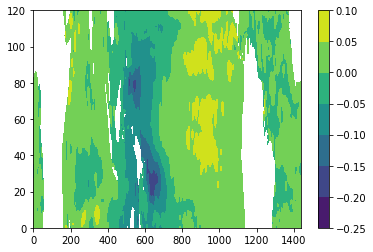

In [19]:
plt.contourf(ds_mean)
plt.colorbar()

### Plot with a Map

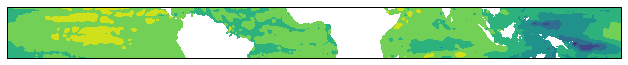

In [36]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
# Adjust lon -> longitude and Lat -> Latitdue from Dataset
ax.contourf(ds['longitude'], ds['latitude'], ds_mean,
            transform = ccrs.PlateCarree())

# Add coastlines (Currently not working) 
#ax.coastlines()

### Cyclic Data and Lat-Lon Labels

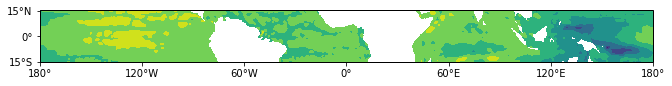

In [43]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean
data, lons = add_cyclic_point(data, coord=ds['longitude'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['latitude'], data,
            transform = ccrs.PlateCarree())

# Add coastlines (Currently not working)
#ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-15,16,15), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

### Change the Colormap

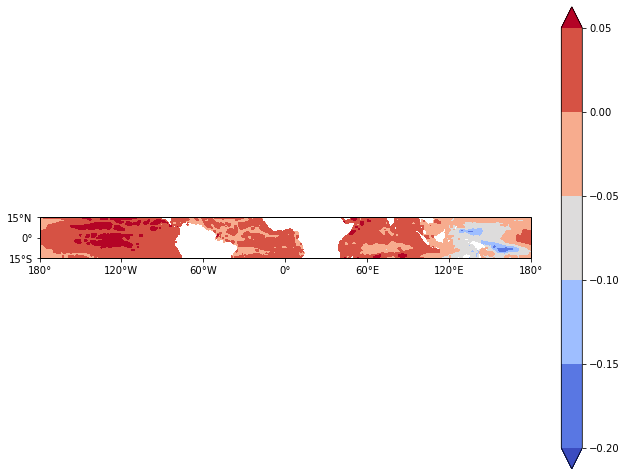

In [51]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean
data, lons = add_cyclic_point(data, coord=ds['longitude'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['latitude'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
#ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-15,16,15), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs)

<div class="alert alert-block alert-info">
    This colorbar is a bit extreme for my taste

### Change the Map Projection

Text(0.5, 1.0, 'AVISO 1993-2015 for 15N - 15S')

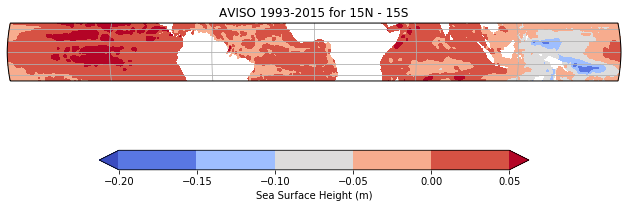

In [52]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point to data
data=ds_mean
data, lons = add_cyclic_point(data, coord=ds['longitude'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['latitude'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
#ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Sea Surface Height (m)')

# Add title
plt.title('AVISO 1993-2015 for 15N - 15S')

<div class="alert alert-block alert-info">
    This is much more reasonable